In [2]:
bids_folder = '/data/ds-tmsrisk/'
import os.path as op
import arviz as az

from tms_risk.cogmodels.fit_model import build_model, get_data
import pymc as pm
from tqdm.notebook import tqdm

In [3]:
dfs = []
models = []
idatas = []

model_labels  = ['flexible1', 'flexible1_null', 'flexible1a', 'flexible1b', 'flexible2', 'flexible2_null', 'flexible2a', 'flexible2b']
model_labels += ['flexible1.4', 'flexible1.4_null', 'flexible1.4a', 'flexible1.4b', 'flexible2.4', 'flexible2.4_null', 'flexible2.4a', 'flexible2.4b']
model_labels += ['flexible1.6', 'flexible1.6_null', 'flexible1.6a', 'flexible1.6b', 'flexible2.6', 'flexible2.6_null', 'flexible2.6a', 'flexible2.6b']

for model_label in tqdm(model_labels):
    dfs.append(get_data(model_label=model_label))

    model = build_model(model_label, dfs[-1])
    idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf')).sel(draw=slice(None, None, 10))
    model.build_estimation_model()
    with model.estimation_model:
        pm.compute_log_likelihood(idata)

    models.append(build_model(model_label, dfs[-1]))
    idatas.append(idata)

  0%|          | 0/24 [00:00<?, ?it/s]

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [8]:
model_mapping = {
    'flexible1': 'Flexible 1',
    'flexible1.4': 'Flexible 1 (4 parameters)',
    'flexible1.6': 'Flexible 1 (6 parameters)',
    'flexible1_null': 'Flexible 1 (null)',
    'flexible1.4_null': 'Flexible 1 (null, 4 parameters)',
    'flexible1.6_null': 'Flexible 1 (null, 6 parameters)',
    'flexible1a': 'Flexible 1 (TMS affects only 1st option)',
    'flexible1.4a': 'Flexible 1 (TMS affects only 1st option, 4 parameters)',
    'flexible1.6a': 'Flexible 1 (TMS affects only 1st option, 6 parameters)',
    'flexible1b': 'Flexible 1 (TMS affects only 2nd option)',
    'flexible1.4b': 'Flexible 1 (TMS affects only 2nd option, 4 parameters)',
    'flexible1.6b': 'Flexible 1 (TMS affects only 2nd option, 6 parameters)',
    
    'flexible2': 'Flexible 2 (perceptual/memory parameters)',
    'flexible2.4': 'Flexible 2 (perceptual/memory parameters, 4 parameters)',
    'flexible2.6': 'Flexible 2 (perceptual/memory parameters, 6 parameters)',
    'flexible2_null': 'Flexible 2 (null)',
    'flexible2.4_null': 'Flexible 2 (null, 4 parameters)',
    'flexible2.6_null': 'Flexible 2 (null, 6 parameters)',
    'flexible2a': 'Flexible 2 (TMS affects memory parameter only)',
    'flexible2.4a': 'Flexible 2 (TMS affects memory parameter only, 4 parameters)',
    'flexible2.6a': 'Flexible 2 (TMS affects memory parameter only, 6 parameters)',
    'flexible2b': 'Flexible 2 (TMS affects perceptual parameter only)',
    'flexible2.4b': 'Flexible 2 (TMS affects perceptual parameter only, 4 parameters)',
    'flexible2.6b': 'Flexible 2 (TMS affects perceptual parameter only, 6 parameters)'
}


In [9]:
models = {}
for model_label, idata in zip(model_labels, idatas):
    models[model_mapping[model_label]] = idata

In [13]:
comparison = az.compare(models)

/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/envs/

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

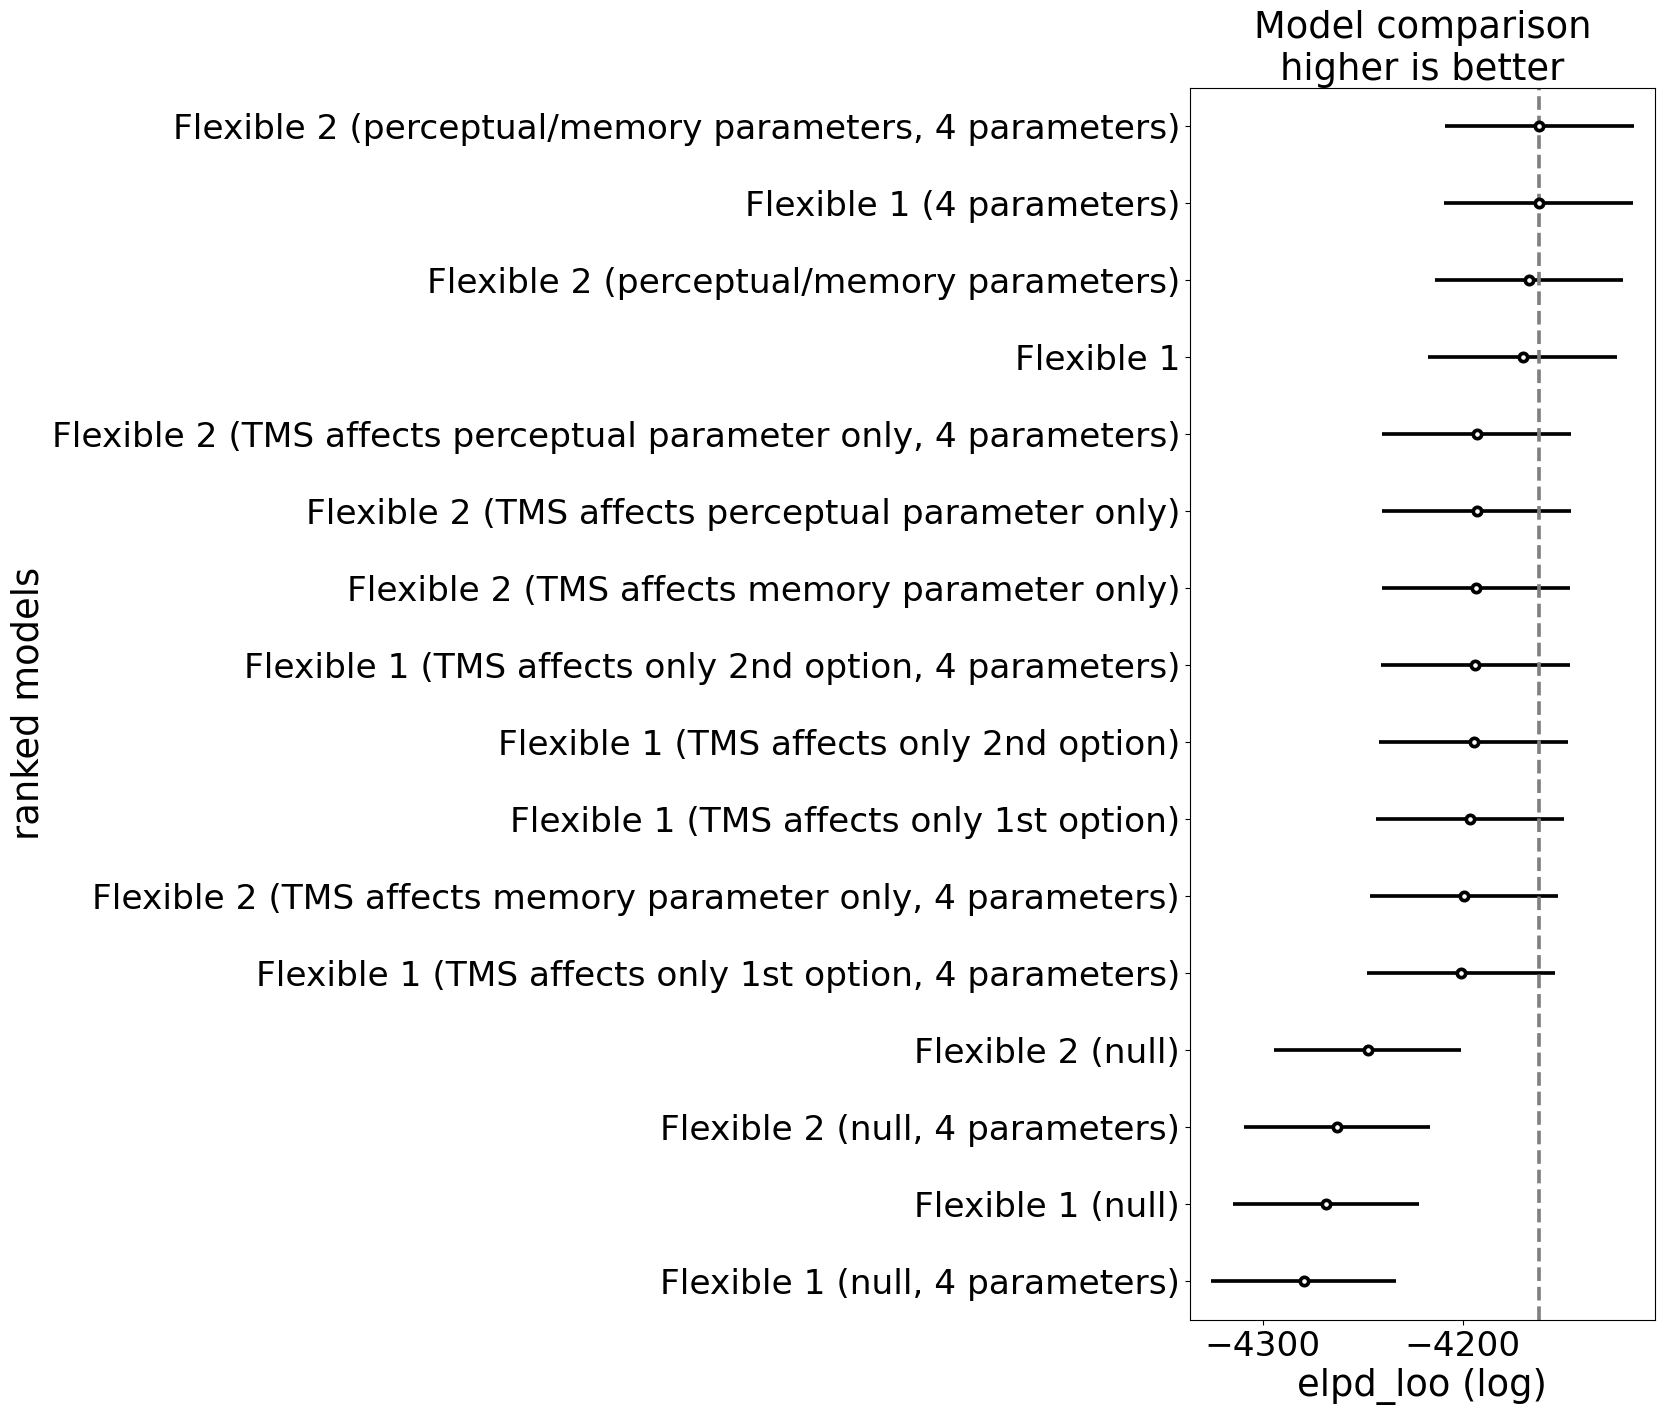

In [14]:
az.plot_compare(comparison)

In [15]:
comparison

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
"Flexible 2 (perceptual/memory parameters, 4 parameters)",0,-4161.713354,263.398715,0.000000,3.894094e-01,47.290809,0.000000,True,log
Flexible 1 (4 parameters),1,-4161.971654,258.870980,0.258300,1.884394e-01,47.293566,1.032473,True,log
Flexible 2 (perceptual/memory parameters),2,-4166.923162,299.206686,5.209807,3.128799e-01,47.175399,8.038739,True,log
Flexible 1,3,-4170.070051,291.327788,8.356696,1.850991e-10,47.187942,8.457385,True,log
"Flexible 2 (TMS affects perceptual parameter only, 4 parameters)",4,-4192.975918,232.130961,31.262563,1.584363e-10,47.256502,7.555009,True,log
Flexible 2 (TMS affects perceptual parameter only),5,-4192.999351,264.659785,31.285997,2.137967e-02,47.153944,10.681181,True,log
Flexible 2 (TMS affects memory parameter only),6,-4193.330638,251.985796,31.617284,8.789168e-02,46.929696,11.374778,True,log
"Flexible 1 (TMS affects only 2nd option, 4 parameters)",7,-4193.709324,228.402519,31.995969,1.572035e-10,47.249971,7.590261,True,log
Flexible 1 (TMS affects only 2nd option),8,-4194.491860,260.417603,32.778506,1.956623e-10,47.162203,10.779195,True,log
Flexible 1 (TMS affects only 1st option),9,-4196.361161,247.186358,34.647807,2.035712e-10,46.868973,11.520139,True,log


In [11]:
comparison = az.compare(models, 'waic')

/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/gdehol/mambaforge/envs/tms_risk/lib/python

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_waic (log)', ylabel='ranked models'>

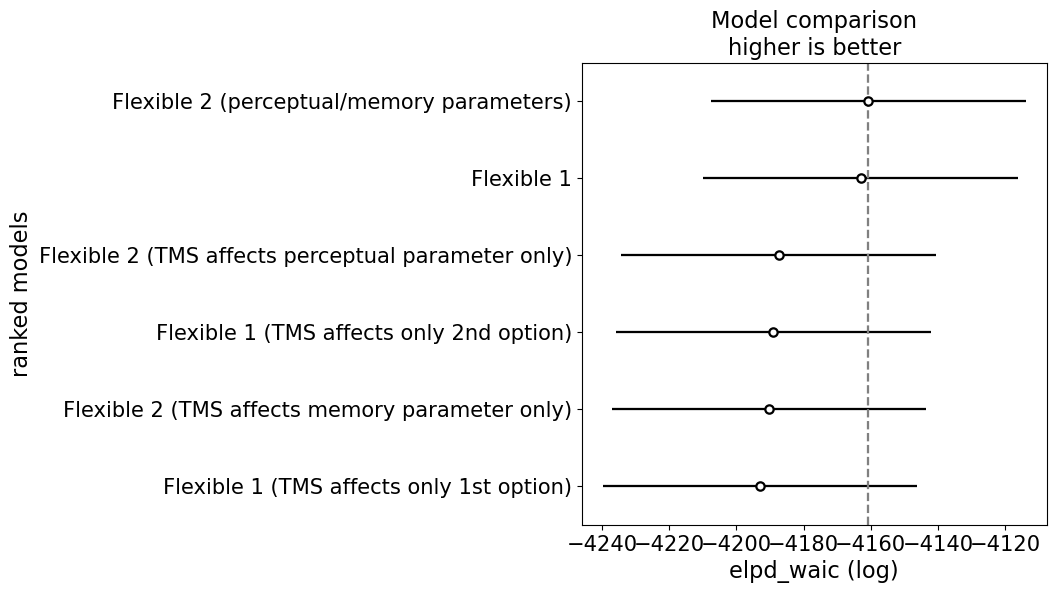

In [12]:
az.plot_compare(comparison)

# 4-parameter models

In [3]:
dfs = []
models = []
idatas = []

# model_labels  = ['flexible1', 'flexible1_null', 'flexible1a', 'flexible1b', 'flexible2', 'flexible2_null', 'flexible2a', 'flexible2b']
model_labels = ['flexible1.4', 'flexible1.4_null', 'flexible1.4a', 'flexible1.4b', 'flexible2.4', 'flexible2.4_null', 'flexible2.4a', 'flexible2.4b']

for model_label in tqdm(model_labels):
    dfs.append(get_data(model_label=model_label))

    model = build_model(model_label, dfs[-1])
    idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf')).sel(draw=slice(None, None, 10))
    model.build_estimation_model()
    with model.estimation_model:
        pm.compute_log_likelihood(idata)

    models.append(build_model(model_label, dfs[-1]))
    idatas.append(idata)

  0%|          | 0/8 [00:00<?, ?it/s]

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [6]:
models = {}
for model_label, idata in zip(model_labels, idatas):
    models[model_mapping[model_label]] = idata

In [7]:
comparison = az.compare(models)

/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/envs/

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

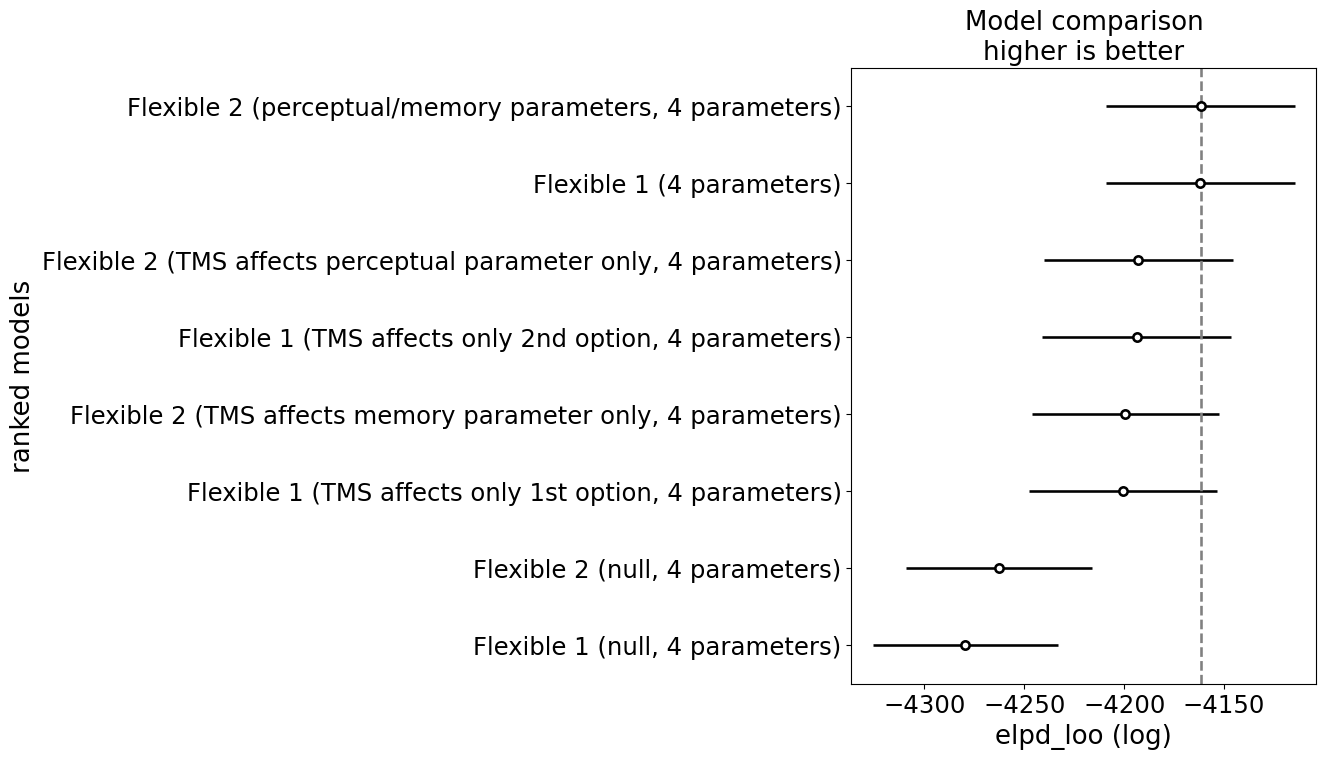

In [8]:
az.plot_compare(comparison)

In [9]:
comparison

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
"Flexible 2 (perceptual/memory parameters, 4 parameters)",0,-4161.713354,263.398715,0.000000,7.085168e-01,47.290809,0.000000,True,log
Flexible 1 (4 parameters),1,-4161.971654,258.870980,0.258300,2.209908e-01,47.293566,1.032473,True,log
"Flexible 2 (TMS affects perceptual parameter only, 4 parameters)",2,-4192.975918,232.130961,31.262563,4.869087e-12,47.256502,7.555009,True,log
"Flexible 1 (TMS affects only 2nd option, 4 parameters)",3,-4193.709324,228.402519,31.995969,4.771712e-12,47.249971,7.590261,True,log
"Flexible 2 (TMS affects memory parameter only, 4 parameters)",4,-4199.379597,228.687710,37.666243,5.706111e-12,46.973803,9.227378,True,log
"Flexible 1 (TMS affects only 1st option, 4 parameters)",5,-4200.676578,223.872166,38.963223,7.049236e-02,46.986349,9.483301,True,log
"Flexible 2 (null, 4 parameters)",6,-4262.822356,174.818700,101.109002,3.568242e-12,46.518621,12.978967,True,log
"Flexible 1 (null, 4 parameters)",7,-4279.545838,176.496922,117.832484,0.000000e+00,46.351246,13.836017,True,log
